# ACM30130 Assignment 1

**Due 2PM Monday 6 October 2025**

This assignment extends our work on the shooting method, and consists of two parts.

This assignment is motivated by [Angry Birds](https://en.wikipedia.org/wiki/Angry_Birds_(video_game)), and provides an example of where the root finding methods and IVP solvers can be combined to find an unknown parameter in a system, not just an initial condition.

The second part extends this example to where we need to solve for multiple conditions at once, using the `root` function.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy.integrate import solve_ivp
from scipy.optimize import root, root_scalar
from numpy import pi
from numpy import cos
from numpy import sin

## Part 1: The yellow bird
In Angry Birds, the aim is to launch a projectile (a bird) at a target (a pig), just like the problem we have covered in class.
Some of the projectiles have special properties, such as the yellow bird, which can impulsively accelerate in the air at a chosen time.
You are going to model the motion of the yellow bird, and make it hit a target using the shooting method.

### a) Solve and plot the projectile motion for given initial conditions and boost time

- Use `solve_ivp` to integrate the equations of motion $$
\ddot{x} = 0, \quad \ddot{y} = -g$$ from $t=0$ to $t=0.5$ with an initial position $(x,y)=(0,0)$ and initial velocity $(\dot{x}, \dot{y}) = (5, 5)$. Use $g=9.81$.
- Taking the values obtained at $t=0.5$, modify the velocity such that the speed is increased to 15, but the direction of motion remains the same.
- Use `solve_ivp` to integrate the same equations from this new state at $t=0.5$ up to $t=1.1$.
- Plot the projectile motion $y(x)$, only showing data where $y>0$.

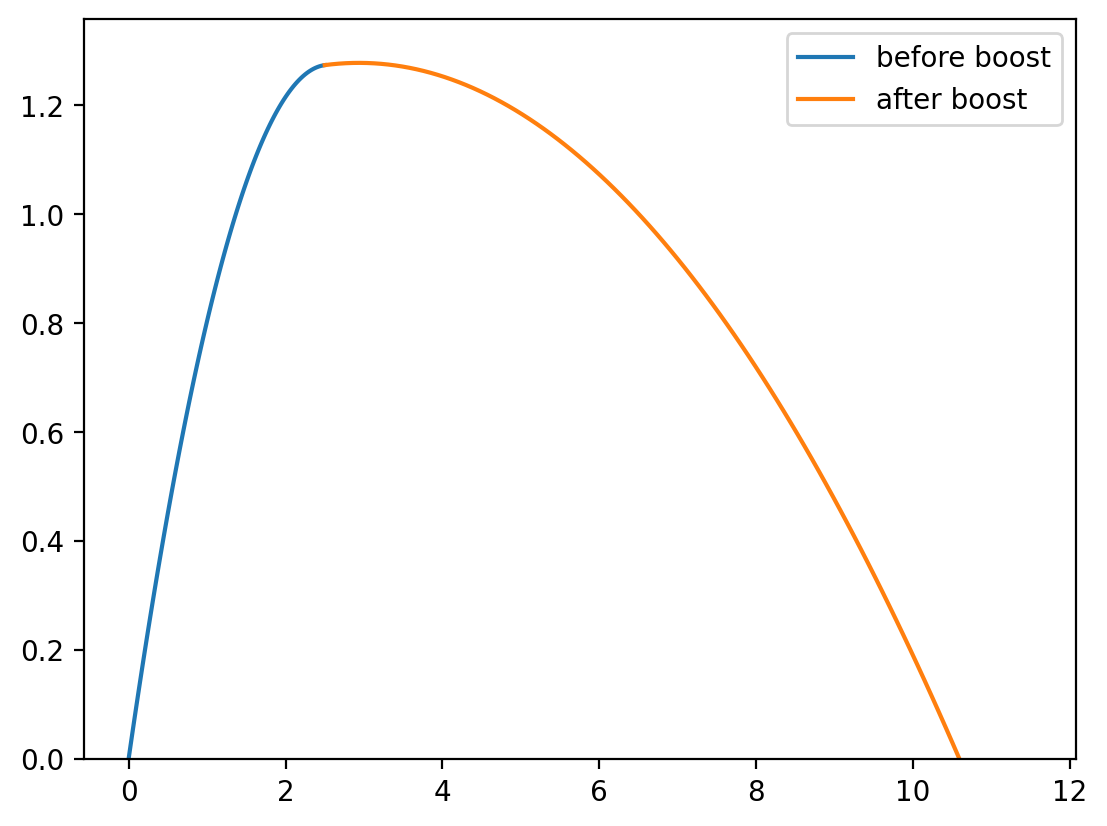

In [6]:
g = 9.81

def f(t,u):  # system
    x,vx,y,vy = u
    return [vx,0,vy,-g]

sol1 = solve_ivp(f, [0, 0.5], [0,5,0,5], dense_output=True) # solves path given initial conds.
tt1 = np.linspace(0,0.5,101)

speedatboost = np.sqrt(sol1.y[1][-1]**2 + sol1.y[3][-1]**2)  # calc total speed at tb
speedincrease = 15/speedatboost  # ratio to increase speed by

# solves path after tb:
sol2 = solve_ivp(f, [0.5, 1.1], [sol1.y[0][-1],float(sol1.y[1][-1])*speedincrease,sol1.y[2][-1],float(sol1.y[3][-1])*speedincrease], dense_output=True)
tt2 = np.linspace(0.5,1.1,101)

plt.plot(sol1.sol(tt1)[0],sol1.sol(tt1)[2],label='before boost') # plot
plt.plot(sol2.sol(tt2)[0],sol2.sol(tt2)[2],label='after boost')
plt.ylim(0)
plt.legend()

### b) Define a function of the boost time that equals zero when a target is hit
Consider the same initial conditions
$$
x(0)=0, \quad \dot{x}(0)=5, \quad y(0)=0, \quad \dot{y}(0)=5
$$
but now let the time at which the speed is modified be a free parameter $t_\mathrm{boost}$.
We are aiming to hit a target at $(x,y) = (9, 0.4)$

Define a Python function that

- takes $t_\mathrm{boost}$ as its (only) input
- solves the IVP from $t=0$ up to $t=t_\mathrm{boost}$
- increases the speed of the projectile to 15
- solves the IVP from $t=t_\mathrm{boost}$ up to $t=t_f$ (where $t_f$ can be determined as when $x(t)=x_\mathrm{target}=9$)
- returns the difference between $y(t_f)$ and $y_\mathrm{target}=0.4$ 

In [7]:
xtarget, ytarget = (9,0.4) # sets target

def func(tb):
    sol3 = solve_ivp(f, [0, tb], [0,5,0,5], dense_output=True)  # pathing before boost
    tt3 = np.linspace(0,tb,101)

    speedatboost = np.sqrt(sol3.y[1][-1]**2 + sol3.y[3][-1]**2)
    speedincrease = 15/speedatboost

    sol4 = solve_ivp(f, [tb, 2.1], [sol3.y[0][-1],float(sol3.y[1][-1])*speedincrease,sol3.y[2][-1],float(sol3.y[3][-1])*speedincrease], dense_output=True)  # pathing after boost
    
    def Fx(t): # shows the diff between the xval and xtarget for ambiguous t
        return sol4.sol(t)[0] - 9
    t_target = float(root_scalar(Fx, x0=1).root)    # finds tf, time at which x val = xytarget
    
    return float(sol4.sol(t_target)[2]) - 0.4     # differnce between y val and ytarget at tf

func(0.5) # if the boost is used at t=0.5, bird will be ~0.076 away from particle (in y direction) at time tf

0.07586750095000372

### c) Plot the output of this function for a range of $t_\mathrm{boost}$ and use `root_scalar` to find the appropriate root

- Plot $F(t_\mathrm{boost})$ for $t_\mathrm{boost}\in[0,2]$ where $F$ is your function from part b).
- Use `root_scalar` to find the value of $t_\mathrm{boost}$ that hits the target
- Plot the trajectory $y(x)$ for this value, including the target as a circular marker on the plot

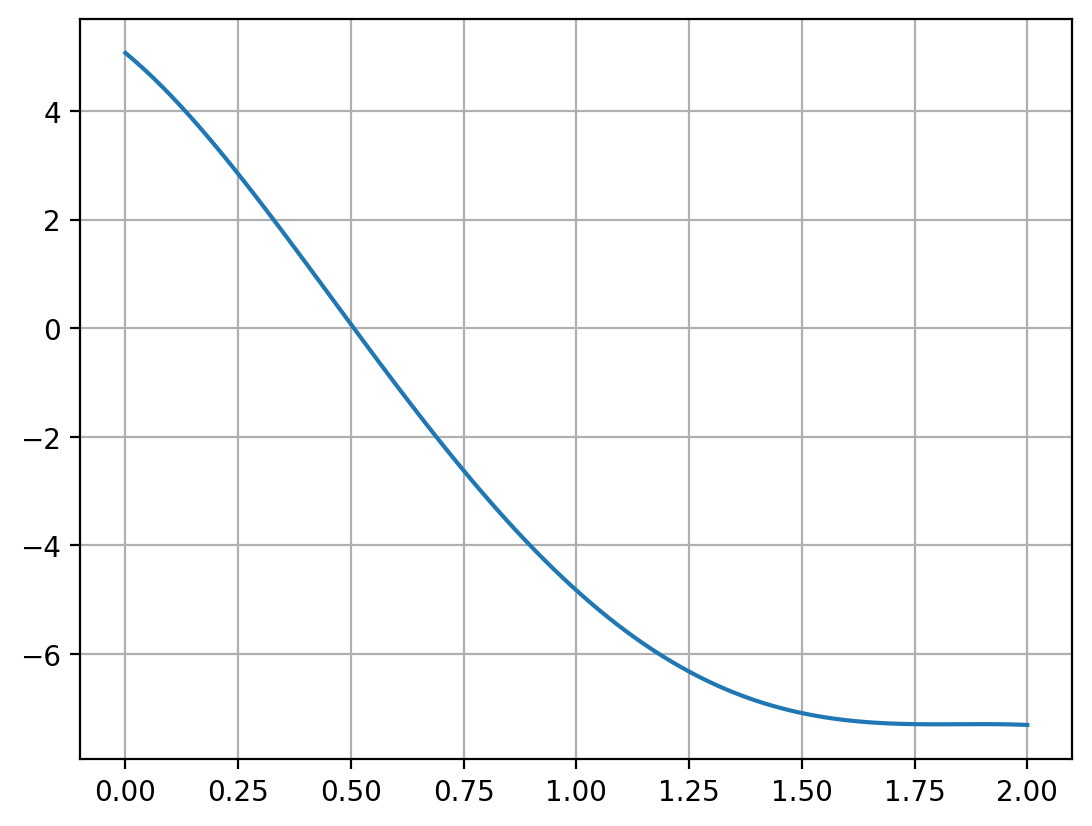

In [9]:
tbs = np.linspace(0,2,100) # for rane 0 - 2
ys = [func(tb) for tb in tbs]   # evaluate func at each tb
plt.grid(True)
plt.plot(tbs, ys) # we can see root at tb ~ 0.5
plt.show()

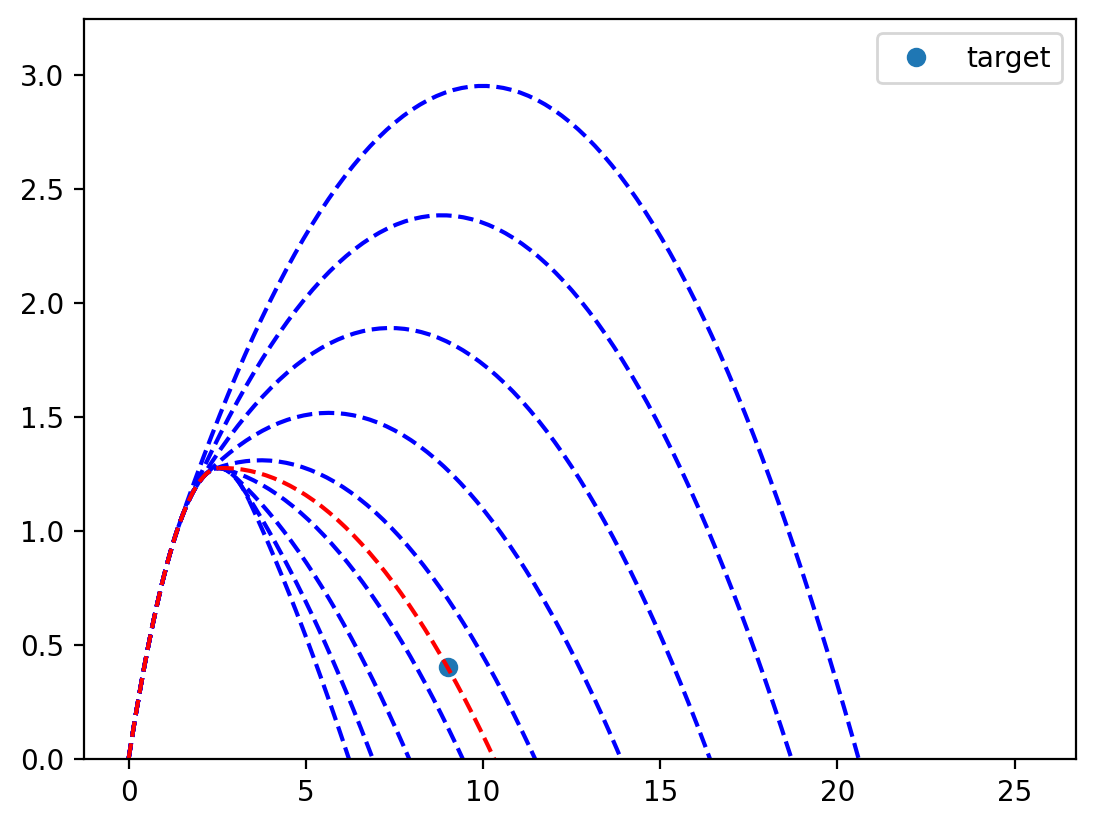

In [10]:
def plots(tb,col):   #  function which plots path for a given tb
    sol3 = solve_ivp(f, [0, tb], [0,5,0,5], dense_output=True)  # pathing before boost
    tt3 = np.linspace(0,tb,101)

    speedatboost = np.sqrt(sol3.y[1][-1]**2 + sol3.y[3][-1]**2)
    speedincrease = 15/speedatboost

    sol4 = solve_ivp(f, [tb, 2], [sol3.y[0][-1],float(sol3.y[1][-1])*speedincrease,sol3.y[2][-1],float(sol3.y[3][-1])*speedincrease], dense_output=True)  # pathing after boost
    tt4 = np.linspace(tb,2,101)

    plt.plot(sol3.sol(tt3)[0], sol3.sol(tt3)[2],color=col,linestyle='--')
    plt.plot(sol4.sol(tt4)[0], sol4.sol(tt4)[2],color=col,linestyle='--')
    plt.ylim(0)
    return
    
for i in np.arange(0.28,0.73,0.05):
    plots(i, 'blue')  # plots for diff values of tb, near best_tb

plt.plot(9,0.4,'o',label='target')  # shows target
plt.legend()

best_tb = root_scalar(func,x0=0.5).root # finds the correct time to use the boost in order to hit the target (0.5067)
plots(best_tb, 'red') # plots ideal trajectory

0.5067367141400055 = time of boost


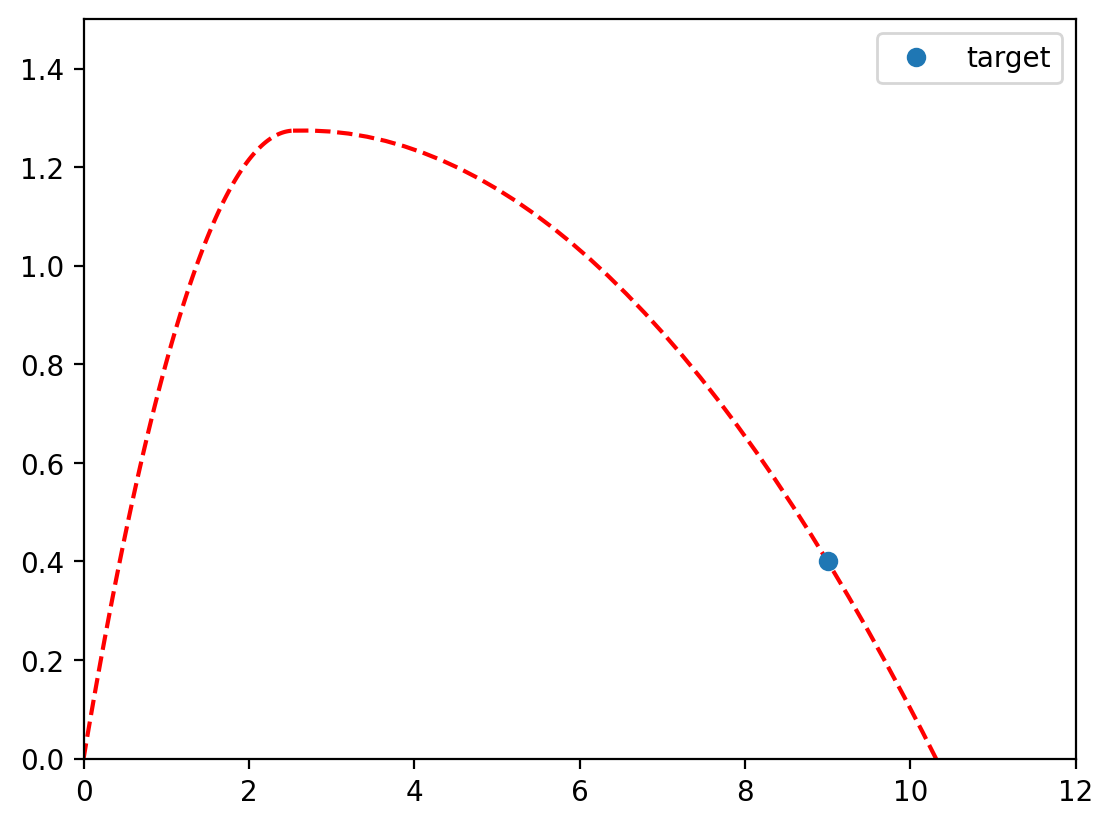

In [11]:
plots(best_tb, 'red')   # plots ideal trajecctory, alone
plt.plot(9,0.4,'o',label='target')
plt.ylim(0,1.5)
plt.xlim(0,12)
plt.legend()
print(best_tb, "= time of boost")

## Part 2: Angry Birds in 3-D

We'll now make things a little more complicated by considering the same problem in 3-D and including air resistance and a crosswind.
The governing equations are now
$$
\begin{align}
\ddot{x} &= -c\dot{x}, \\ \ddot{y} &= -c\dot{y} - g, \\ \ddot{z} &= -c(\dot{z} - 1).
\end{align}
$$

The projectile still starts at the origin $(x,y,z)=(0,0,0)$ and the target will be in the same location $(x,y,z) = (9,0.4,0)$.
The intial velocity of the projectile can be expressed as
$$
\dot{x}(0) = v_0 \cos\theta \cos\phi, \qquad
\dot{y}(0) = v_0 \sin\theta, \qquad
\dot{z}(0) = v_0 \cos\theta \sin\phi.
$$
where we fix the initial speed as $v_0=7$ and the elevation angle as $\theta=\pi/4$.
In the governing equations, take $c=1$.

We can express this as a problem of three conditions $(x,y,z)|_{t=t_f}=(9, 0.4, 0)$ for three unknowns:

- the horizontal angle $\phi$,
- the boost time $t_\mathrm{boost}$,
- the final time of integration $t_f$.

Set up the problem as in part 1, but now with a vector function to impose these three boundary conditions at the target.
Plot the resulting trajectory, either as 2 subplots with top-down and side-on views, or as a [3-D line plot](https://matplotlib.org/stable/gallery/mplot3d/lines3d.html)

-0.09758262411142132 = phi   0.33829146095188667 = tboost   1.0642836706208187 = tf



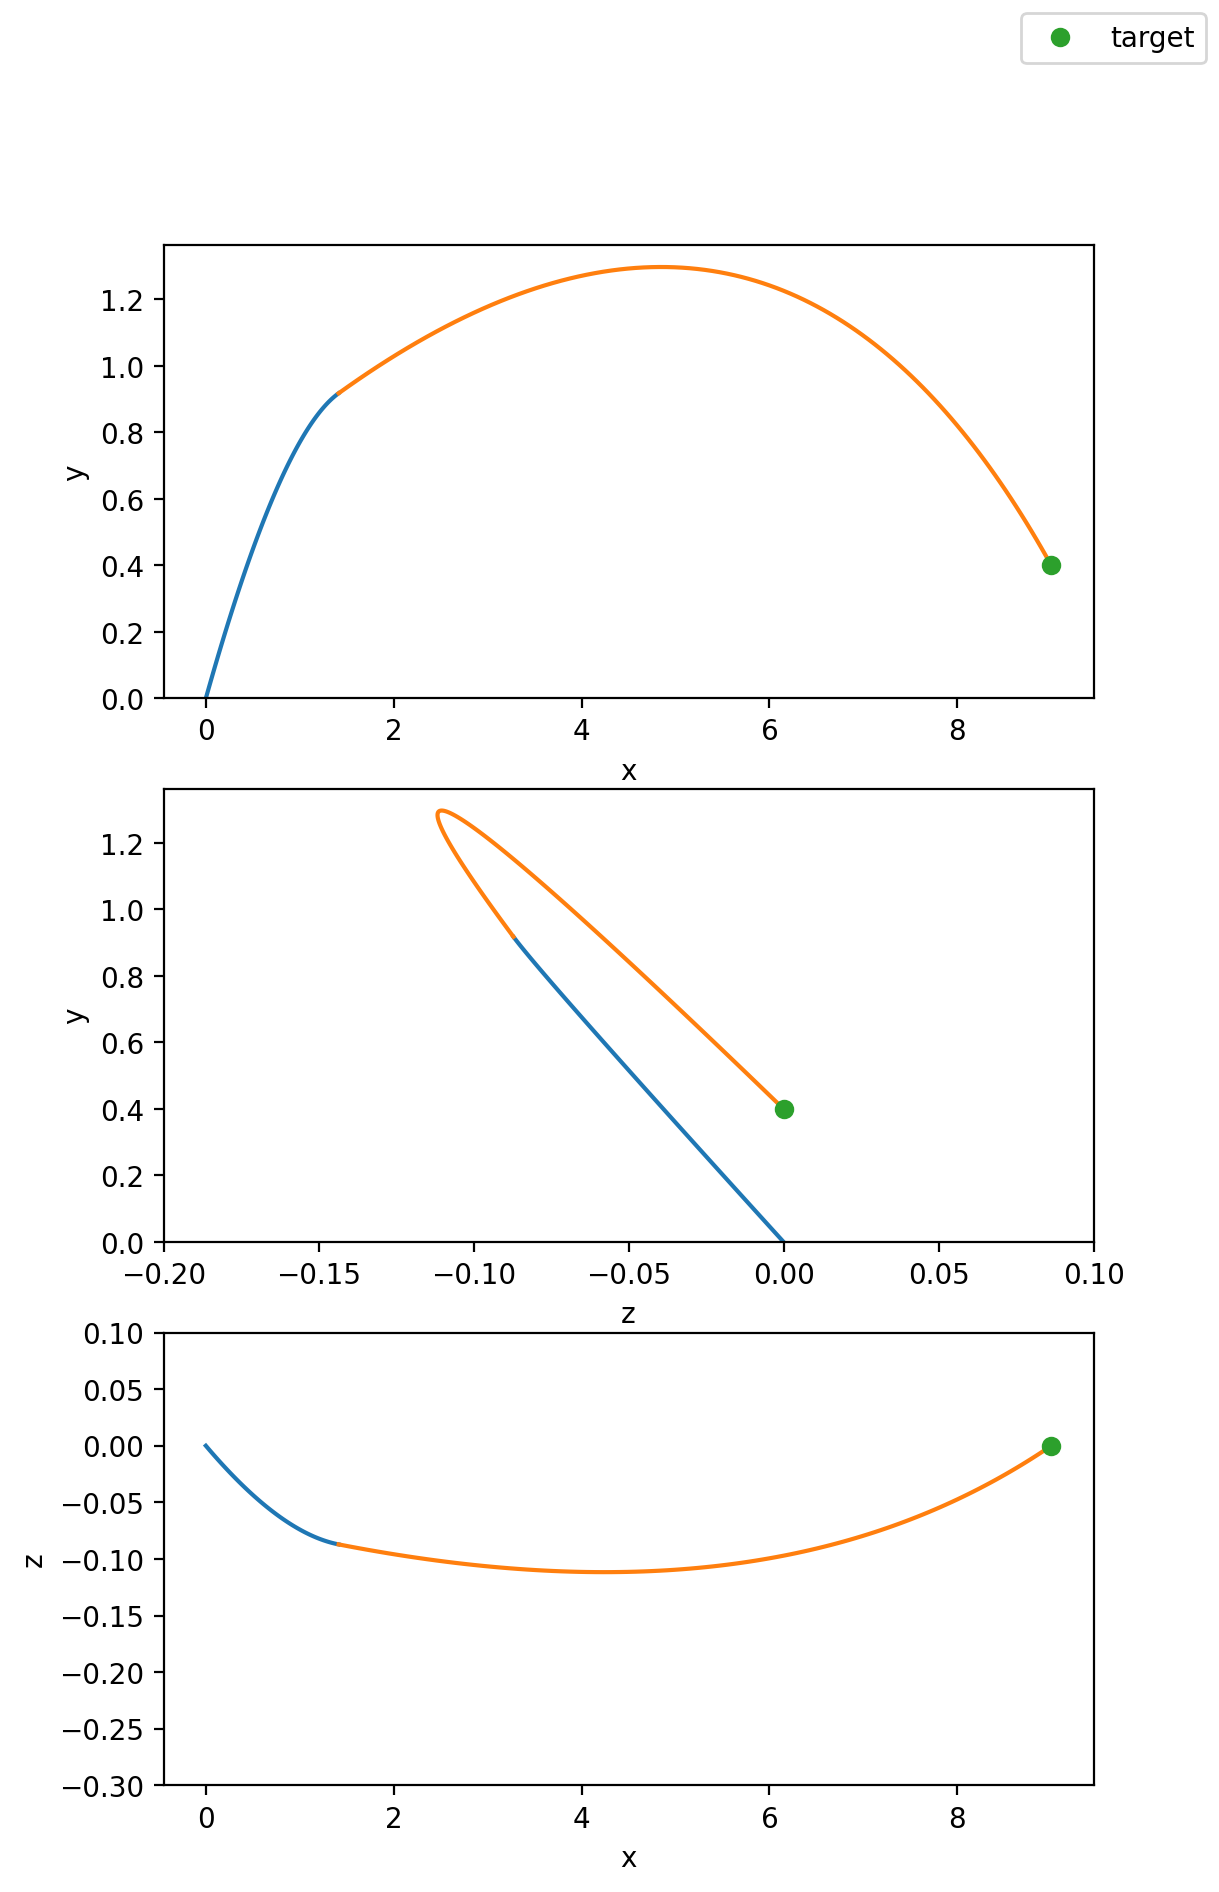

In [14]:
g = 9.81
c = 1   # air resistance coeff
xtarget, ytarget, ztarget = (9, 0.4, 0)  # 3d target
v0 = 7  # intial velo
theta = pi/4  # launch angle 
# unknowns : phi , tb , tf

def f(t,u):
    x,vx,y,vy,z,vz = u
    return [vx,-c*vx,vy,-g-c*vy,vz,-c*(vz-1)]  # new system

def speed0(phi):  # gives intial speed vector of porjectile given launch angle phi
    vx0 = v0*cos(theta)*cos(phi)
    vy0 = v0*sin(theta)
    vz0 = v0*cos(theta)*sin(phi)
    return [0,v0*cos(theta)*cos(phi),0,v0*sin(theta),0,v0*cos(theta)*sin(phi)]

def targetdistance(inputs):    # computes distance to target at tf gievn initial conds
    phi, tb, tf = inputs
    sol1 = solve_ivp(f, [0,tb], speed0(phi), dense_output=True) # path from t = 0, to t = tb
    tt = np.linspace(0,tb,100)
    ttt = np.linspace(tb,tf,100)
    
    velotb = [sol1.sol(tt)[1][-1], sol1.sol(tt)[3][-1], sol1.sol(tt)[5][-1]]  # velo at tb
    speedtb = np.sqrt(sol1.sol(tt)[1][-1]**2 + sol1.sol(tt)[3][-1]**2 + sol1.sol(tt)[5][-1]**2)  # computes total speed at tb
    speedincrease = 15/speedtb # ratio of speed increase
    newvelo = [sol1.sol(tt)[1][-1]*speedincrease, sol1.sol(tt)[3][-1]*speedincrease, sol1.sol(tt)[5][-1]*speedincrease]
    newstate = [sol1.sol(tt)[0][-1],newvelo[0],sol1.sol(tt)[2][-1],newvelo[1],sol1.sol(tt)[4][-1],newvelo[2]]

    sol2 = solve_ivp(f, [tb,tf], newstate, dense_output=True) # path from t = tb, to t = tf
    xf, yf, zf = sol2.y[0,-1], sol2.y[2,-1], sol2.y[4,-1]   
    return [xf-9,yf-0.4,zf] # displacement vector to target at tf

solf = root(targetdistance, [0.1, 0.5, 2.0])  # initial guess
phi, tb, tf = solf.x
print(phi,"= phi  ", tb, "= tboost  ", tf, "= tf")  # gives optimal initail conds
print("")
plotting(solf.x) # using the (very long) function below

In [13]:
def plotting(inputs):
    phi, tb, tf = inputs
    sol1 = solve_ivp(f, [0,tb], speed0(phi), dense_output=True)
    tt = np.linspace(0,tb,100)
    ttt = np.linspace(tb,tf,100)
    
    velotb = [sol1.sol(tt)[1][-1], sol1.sol(tt)[3][-1], sol1.sol(tt)[5][-1]]
    speedtb = np.sqrt(sol1.sol(tt)[1][-1]**2 + sol1.sol(tt)[3][-1]**2 + sol1.sol(tt)[5][-1]**2)
    speedincrease = 15/speedtb
    newvelo = [sol1.sol(tt)[1][-1]*speedincrease, sol1.sol(tt)[3][-1]*speedincrease, sol1.sol(tt)[5][-1]*speedincrease]
    newstate = [sol1.sol(tt)[0][-1],newvelo[0],sol1.sol(tt)[2][-1],newvelo[1],sol1.sol(tt)[4][-1],newvelo[2]]

    sol2 = solve_ivp(f, [tb,tf], newstate, dense_output=True)
    
    fig , ax = plt.subplots(3,figsize=(6, 10))   # lots of plotting code
    ax[0].plot(sol1.sol(tt)[0],sol1.sol(tt)[2])
    ax[1].plot(sol1.sol(tt)[4],sol1.sol(tt)[2])
    ax[2].plot(sol1.sol(tt)[0],sol1.sol(tt)[4])
    ax[0].plot(sol2.sol(ttt)[0],sol2.sol(ttt)[2])
    ax[1].plot(sol2.sol(ttt)[4],sol2.sol(ttt)[2])
    ax[2].plot(sol2.sol(ttt)[0],sol2.sol(ttt)[4])
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[1].set_xlabel("z")
    ax[1].set_ylabel("y")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("z")
    ax[0].plot(9,0.4,'o')
    ax[1].plot(0,0.4,'o')
    ax[2].plot(9,0,'o', label='target')
    ax[0].set_ylim(0)
    ax[1].set_ylim(0) 
    ax[1].set_xlim(-0.2,0.1)
    ax[2].set_ylim(-0.3,0.1)
    fig.legend()
    return 

Finally, suppose that the target is circling around following the curve $(x,z) = (8+\cos[2\pi t], \sin[2\pi t])$, remaining at the height $y=0.4$. Adapt the function to hit the moving target.

-0.05943939057290313 = phi   0.3400538552348834 = tboost   1.0552395033965856 = tf



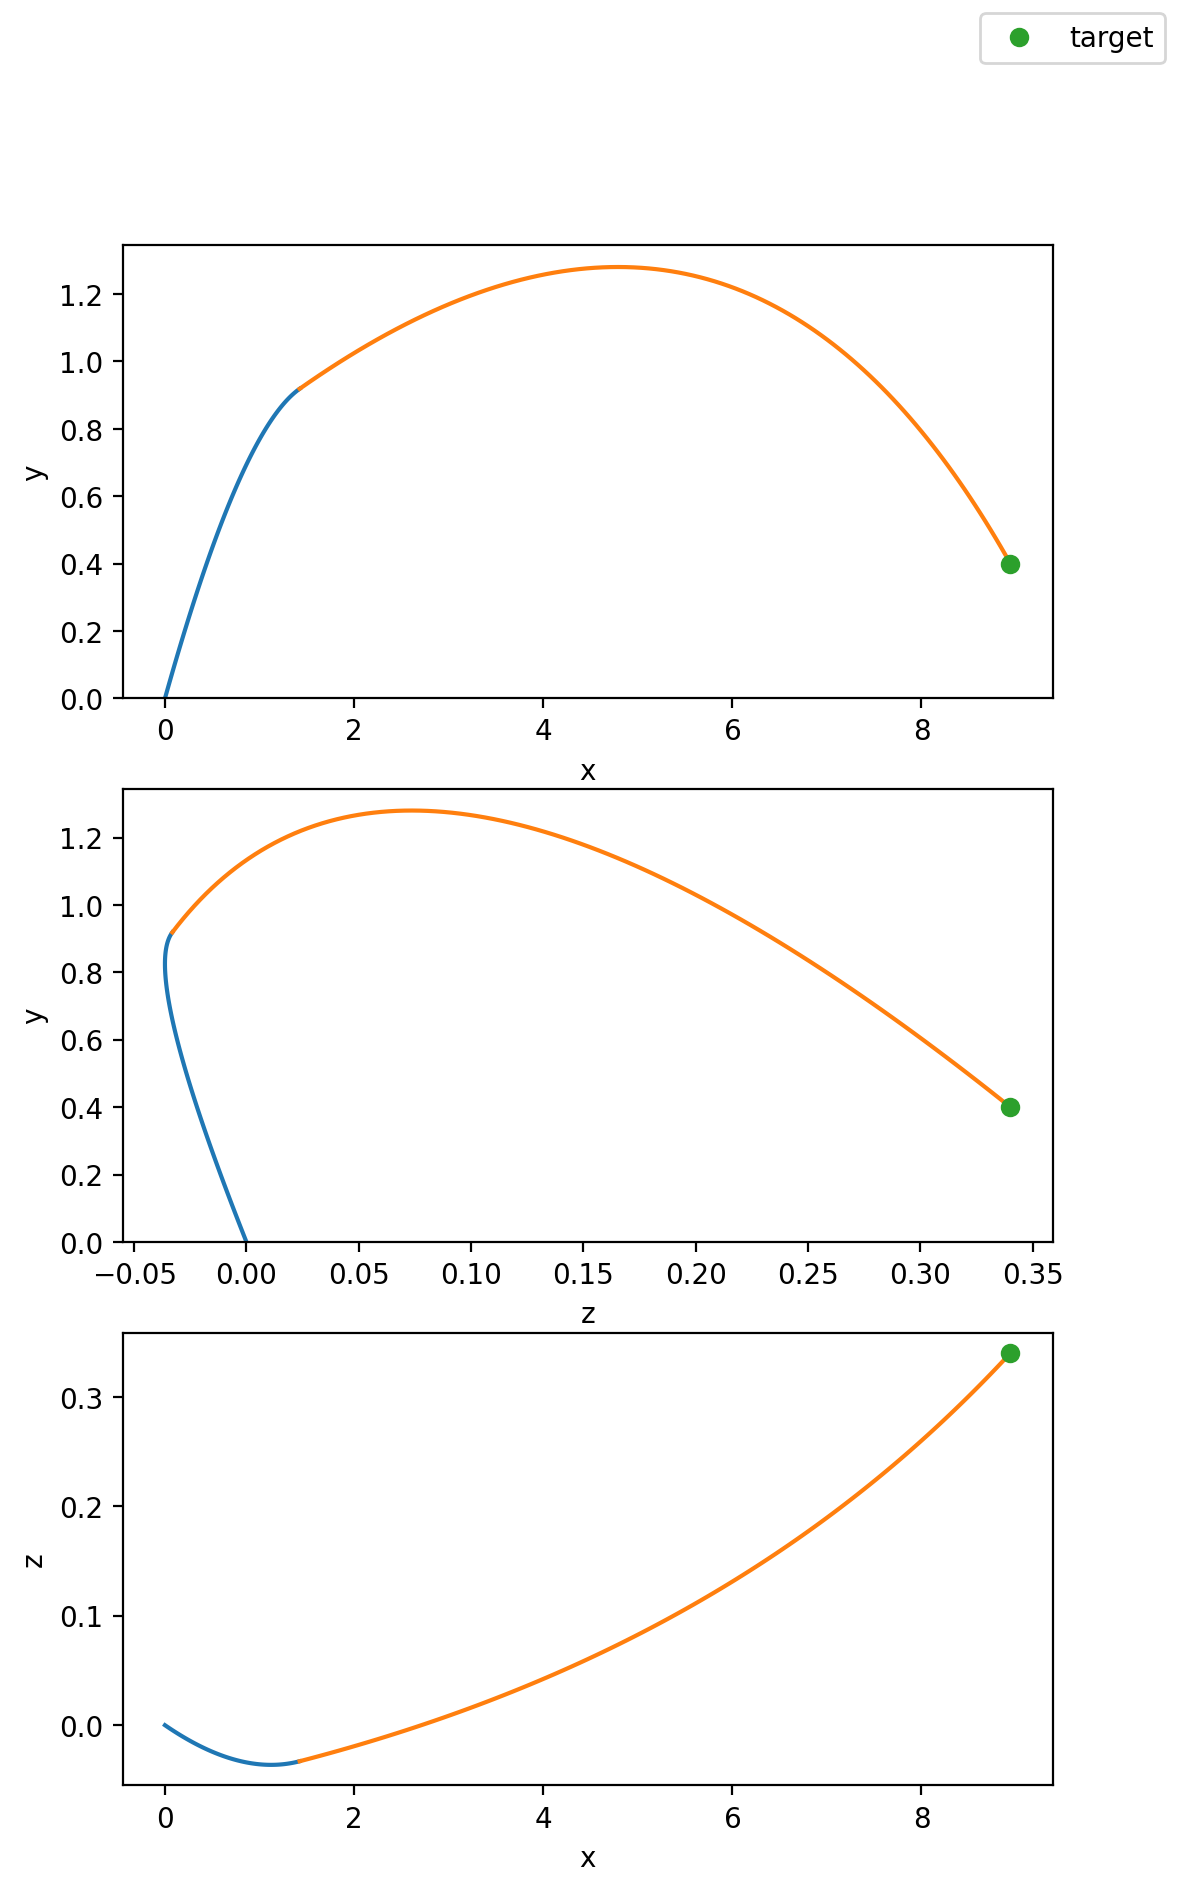

In [16]:
def targetdistance_adapted(inputs):   # same code to incorporate moving target
    phi, tb, tf = inputs
    sol1 = solve_ivp(f, [0,tb], speed0(phi), dense_output=True)
    tt = np.linspace(0,tb,100)
    ttt = np.linspace(tb,tf,100)
    
    velotb = [sol1.sol(tt)[1][-1], sol1.sol(tt)[3][-1], sol1.sol(tt)[5][-1]]
    speedtb = np.sqrt(sol1.sol(tt)[1][-1]**2 + sol1.sol(tt)[3][-1]**2 + sol1.sol(tt)[5][-1]**2)
    speedincrease = 15/speedtb
    newvelo = [sol1.sol(tt)[1][-1]*speedincrease, sol1.sol(tt)[3][-1]*speedincrease, sol1.sol(tt)[5][-1]*speedincrease]
    newstate = [sol1.sol(tt)[0][-1],newvelo[0],sol1.sol(tt)[2][-1],newvelo[1],sol1.sol(tt)[4][-1],newvelo[2]]

    sol2 = solve_ivp(f, [tb,tf], newstate, dense_output=True)
    xf, yf, zf = sol2.y[0,-1], sol2.y[2,-1], sol2.y[4,-1]   
    return [xf-(8+cos(2*pi*tf)),yf-0.4, zf-(sin(2*pi*tf))]  # uses targets position at t = tf

solf2 = root(targetdistance_adapted, [0.1, 0.5, 2.0])  # initial guess for conditions 
phi, tb, tf = solf2.x
print(phi,"= phi  ", tb, "= tboost  ", tf, "= tf")
print("")
plotting_adapted(solf2.x) 

In [15]:
def plotting_adapted(inputs):  # same plotting code, just adapted for moving target
    phi, tb, tf = inputs
    sol1 = solve_ivp(f, [0,tb], speed0(phi), dense_output=True)
    tt = np.linspace(0,tb,100)
    ttt = np.linspace(tb,tf,100)
    
    velotb = [sol1.sol(tt)[1][-1], sol1.sol(tt)[3][-1], sol1.sol(tt)[5][-1]]
    speedtb = np.sqrt(sol1.sol(tt)[1][-1]**2 + sol1.sol(tt)[3][-1]**2 + sol1.sol(tt)[5][-1]**2)
    speedincrease = 15/speedtb
    newvelo = [sol1.sol(tt)[1][-1]*speedincrease, sol1.sol(tt)[3][-1]*speedincrease, sol1.sol(tt)[5][-1]*speedincrease]
    newstate = [sol1.sol(tt)[0][-1],newvelo[0],sol1.sol(tt)[2][-1],newvelo[1],sol1.sol(tt)[4][-1],newvelo[2]]

    sol2 = solve_ivp(f, [tb,tf], newstate, dense_output=True)
    
    fig , ax = plt.subplots(3,figsize=(6, 10))
    ax[0].plot(sol1.sol(tt)[0],sol1.sol(tt)[2])
    ax[1].plot(sol1.sol(tt)[4],sol1.sol(tt)[2])
    ax[2].plot(sol1.sol(tt)[0],sol1.sol(tt)[4])
    ax[0].plot(sol2.sol(ttt)[0],sol2.sol(ttt)[2])
    ax[1].plot(sol2.sol(ttt)[4],sol2.sol(ttt)[2])
    ax[2].plot(sol2.sol(ttt)[0],sol2.sol(ttt)[4])
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[1].set_xlabel("z")
    ax[1].set_ylabel("y")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("z")
    ax[0].plot(8+cos(2*pi*tf),0.4,'o')
    ax[1].plot(sin(2*pi*tf),0.4,'o')
    ax[2].plot(8+cos(2*pi*tf),sin(2*pi*tf),'o', label='target')
    ax[0].set_ylim(0)
    ax[1].set_ylim(0) 
    fig.legend()
    return 